In [1]:
%matplotlib inline

morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'

In [2]:
import os
dirname = "/Users/aphearin/Dropbox/protoDC2/umachine_z0p1_color_mock"
fname = os.path.join(dirname, "umachine_z0p1_color_mock.hdf5")

from astropy.table import Table
mock = Table.read(fname, path='data')
# print(mock.keys())

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
from cosmodc2.stellar_mass_remapping import lift_high_mass_mstar

z = np.zeros(len(mock))
mock['mstar_new'] = lift_high_mass_mstar(mock['mpeak'], mock['obs_sm'], z + 1)

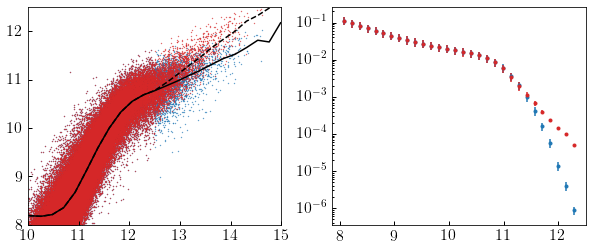

In [10]:
from scipy.stats import binned_statistic
median_logsm, logmpeak_bins, __ = binned_statistic(
    np.log10(mock['mpeak']), np.log10(mock['obs_sm']), bins=25)

median_logsm_new, __, __ = binned_statistic(
    np.log10(mock['mpeak']), np.log10(mock['mstar_new']), bins=logmpeak_bins)

logmpeak_mids = 0.5*(logmpeak_bins[:-1] + logmpeak_bins[1:])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

nskip = 10
__=ax1.scatter(np.log10(mock['mpeak'][::nskip]), 
              np.log10(mock['obs_sm'][::nskip]), s=0.1, color=mblue)

__=ax1.scatter(np.log10(mock['mpeak'][::nskip]), 
              np.log10(mock['mstar_new'][::nskip]), s=0.1, color=mred)

__=ax1.plot(logmpeak_mids, median_logsm_new, '--', color='k')
__=ax1.plot(logmpeak_mids, median_logsm, color='k')

xlim1 = ax1.set_xlim(10., 15)
ylim1 = ax1.set_ylim(8., 12.5)


Lbox = 250.
volume = Lbox**3.
nbins=30
counts, bin_edges = np.histogram(np.log10(mock['obs_sm']), bins=nbins)
bin_mids = 0.5*(bin_edges[:-1] + bin_edges[1:])
delta_logsm = np.diff(bin_edges)[0]

counts2, __ = np.histogram(np.log10(mock['mstar_new']), bin_edges)

smf = counts/volume/delta_logsm
smf2 = counts2/volume/delta_logsm

yscale2 = ax2.set_yscale('log')
__=ax2.errorbar(bin_mids, smf, smf*0.25, fmt='.', color=mblue)
__=ax2.errorbar(bin_mids, smf2, smf*0.25, fmt='.', color=mred)

In [14]:
# print(smf2/smf)
# print(bin_mids)